---

# CSCI 3202, Spring 2022
# Homework 3
# Due: Friday March 11, 2022 at 6:00 PM

<br> 

### Your name: Zhanchao Yang

<br> 

---

Some useful packages and libraries:



In [523]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import deque
import heapq
import unittest
from scipy import stats
import copy as cp
from time import time
import math

---

## Problem 1: Game Theory - Playing "intelligent" Tic-Tac-Toe

<img src="https://www.cookieshq.co.uk/images/2016/06/01/tic-tac-toe.png" width="150"/>



### (1a)   Defining the Tic-Tac-Toe class structure

Fill in this class structure for Tic-Tac-Toe using what we did during class as a guide.
* `moves` is a list of tuples to represent which moves are available. Recall that we are using matrix notation for this, where the upper-left corner of the board, for example, is represented at (1,1).
* `result(self, move, state)` returns a ***hypothetical*** resulting `State` object if `move` is made when the game is in the current `state`
* `compute_utility(self, move, state)` calculates the utility of `state` that would result if `move` is made when the game is in the current `state`. This is where you want to check to see if anyone has gotten `nwin` in a row
* `game_over(self, state)` - this wasn't a method, but it should be - it's a piece of code we need to execute repeatedly and giving it a name makes clear what task the piece of code performs. Returns `True` if the game in the given `state` has reached a terminal state, and `False` otherwise.
* `utility(self, state, player)` also wasn't a method earlier, but also should be.  Returns the utility of the current state if the player is X and $-1 \cdot$ utility if the player is O.
* `display(self)` is a method to display the current game `state`, You get it for free! because this would be super frustrating without it.
* `play_game(self, player1, player2)` returns an integer that is the utility of the outcome of the game (+1 if X wins, 0 if draw, -1 if O wins). `player1` and `player2` are functional arguments that we will deal with in parts **1b** and **1d**.

Some notes:
* Assume X always goes first.
* Do **not** hard-code for 3x3 boards.
* You may add attributes and methods to these classes as needed for this problem.

In [524]:
#1a using the code of Lecture 16 - Games Notebook, and make a bit change 
#link:https://canvas.colorado.edu/courses/78688/files/41664509?module_item_id=3332208
#change: make a count var in the tictactoe init function, catch the number of time of doing minimax
class State:
    def __init__(self, moves):
        self.to_move = 'X'
        self.utility = 0
        self.board = {}
        self.moves = moves

        
class TicTacToe:
    
    def __init__(self, nrow=3, ncol=3, nwin=3, nexp=0):
        #add a new var for count expaned node
        self.expand_count=0
        self.nrow = nrow
        self.ncol = ncol
        self.nwin = nwin
        moves = [(row, col) for row in range(1, nrow + 1) for col in range(1, ncol + 1)]
        self.state = State(moves)

    def result(self, move, state):
        '''
        What is the hypothetical result of move `move` in state `state` ?
        move  = (row, col) tuple where player will put their mark (X or O)
        state = a `State` object, to represent whose turn it is and form
                the basis for generating a **hypothetical** updated state
                that will result from making the given `move`
        '''

        # your code goes here
        if move not in state.moves:
            return state
        # Return a copy of the updated state:
        #   compute utility, update the board, remove the move, update whose turn
        new_state = cp.deepcopy(state)
        new_state.utility = self.compute_utility(move, state)
        new_state.board[move] = state.to_move
        new_state.moves.remove(move)
        new_state.to_move = ('O' if state.to_move == 'X' else 'X')
        return new_state

        
    def compute_utility(self, move, state):
        '''
        What is the utility of making move `move` in state `state`?
        If 'X' wins with this move, return 1;
        if 'O' wins return -1;
        else return 0.
        '''        

        # your code goes here
        row, col = move
        player = state.to_move
        
        # create a hypothetical copy of the board, with 'move' executed
        board = cp.deepcopy(state.board)
        board[move] = player

        # what are all the ways 'player' could with with 'move'?
        
        # check for row-wise win
        in_a_row = 0
        for c in range(1,self.ncol+1):
            in_a_row += board.get((row,c))==player

        # check for column-wise win
        in_a_col = 0
        for r in range(1,self.nrow+1):
            in_a_col += board.get((r,col))==player

        # check for NW->SE diagonal win
        in_a_diag1 = 0
        for r in range(row,0,-1):
            in_a_diag1 += board.get((r,col-(row-r)))==player
        for r in range(row+1,self.nrow+1):
            in_a_diag1 += board.get((r,col-(row-r)))==player

        # check for SW->NE diagonal win
        in_a_diag2 = 0
        for r in range(row,0,-1):
            in_a_diag2 += board.get((r,col+(row-r)))==player
        for r in range(row+1,self.nrow+1):
            in_a_diag2 += board.get((r,col+(row-r)))==player
        
        if self.nwin in [in_a_row, in_a_col, in_a_diag1, in_a_diag2]:
            return 1 if player=='X' else -1
        else:
            return 0

    def game_over(self, state):
        '''game is over if someone has won (utility!=0) or there
        are no more moves left'''

        # your code goes here
        return state.utility!=0 or len(state.moves)==0    
    
    def utility(self, state, player):
        '''Return the value to player; 1 for win, -1 for loss, 0 otherwise.'''

        # your code goes here
        return state.utility if player=='X' else -state.utility
        
        
    def display(self):
        for row in range(1, self.nrow+1):
            for col in range(1, self.ncol+1):
                print(self.state.board.get((row, col), '.'), end=' ')
            print()
        
    def play_game(self, player1, player2):
        '''Play a game of tic-tac-toe!'''

        # your code goes here
        turn_limit = self.nrow*self.ncol  # limit in case of buggy code
        turn = 0
        while turn<=turn_limit:
            for player in [player1, player2]:
                turn += 1
                move = player(self)
                self.state = self.result(move, self.state)
                if self.game_over(self.state):
                    self.display()
                    return self.state.utility 

### (1b) Define a random player

Define a function `random_player` that takes a single argument of the `TicTacToe` class and returns a random move out of the available legal moves in the `state` of the `TicTacToe` game.

In your code for the `play_game` method above, make sure that `random_player` could be a viable input for the `player1` and/or `player2` arguments.

In [836]:
def random_player(game):
    '''A player that chooses a legal move at random out of all
    available legal moves in Tic-Tac-Toe state argument'''

    
    # your code goes here...
    possible_actions = game.state.moves
    return possible_actions[np.random.randint(low=0, high=len(possible_actions))]

We know from experience and/or because I'm telling you right now that if two `random_player`s play many games of Tic-Tac-Toe against one another, whoever goes first will win about 58% of the time.  Verify that this is the case by playing at least 1,000 games between two random players. Report the proportion of the games that the first player has won.

**"Unit tests":** If you are wondering how close is close enough to 58%, I simulated 100 tournaments of 1,000 games each. The min-max range of win percentage by the first player was 54-63%.

In [837]:
# 1000 games between two random players
# Your code here
#normal board, define"game" as one of the tictactoe game,make a list of outcome, then append each 1000 
# trial outcomes into list
outcome = []
for i in range(0,1000):
    game = TicTacToe(3,3,3)
    result=game.play_game(random_player, random_player)
    outcome.append(result)

O . O 
X . O 
X X X 
O O X 
X X O 
O X X 
X O O 
X X O 
. X O 
O O X 
X X X 
O X O 
O O X 
X O O 
X X X 
. . . 
X X X 
. O O 
O X O 
X X X 
O X O 
. X X 
X X O 
O O O 
X X X 
X O O 
O O X 
O O X 
O X X 
X X O 
O X X 
O . . 
O . X 
O X . 
X O . 
. X O 
O X X 
O X X 
X O O 
X O X 
X O O 
X X O 
. X . 
. X . 
O X O 
X X X 
O O X 
X O O 
X O . 
. X O 
X O X 
O O X 
X X O 
O X X 
X O O 
O X X 
X X O 
O O X 
X X X 
O X O 
X O O 
. X O 
. X X 
O X X 
. X . 
X O O 
X X O 
O O X 
X O X 
. . X 
X . X 
O O O 
X O . 
. O O 
X X X 
X O O 
X X X 
O X O 
O X X 
X O O 
X O X 
X O O 
X . . 
X X O 
X X . 
. . X 
O O O 
O X O 
X X O 
X O X 
X X X 
X O . 
. O O 
O X X 
X O O 
O X X 
X . O 
X X . 
X O O 
O X X 
O . X 
O X O 
O X X 
X O X 
O O X 
. O O 
X O X 
X O X 
. X O 
. X . 
. X O 
. O . 
. . O 
X X X 
X O O 
X O . 
O X X 
O . X 
X . X 
O O X 
X O X 
X . O 
X O . 
O O O 
X . X 
X O X 
O X O 
X X O 
X . O 
O X O 
O X X 
X O X 
O X O 
O X X 
X X O 
X O O 
. X X 
. O X 
O . . 
X X X 
O X O 
O X O 
O . . 

In [838]:
#since outcome is a list of  -1,1,0 ,count these number
#divided total number to see the probability 
#list.count function https://www.w3schools.com/python/ref_list_count.asp

p_win=(outcome.count(1)/1000)*100
p_lose=(outcome.count(-1)/1000)*100
p_tie=(outcome.count(0)/1000)*100

print("Probability of win:", p_win,"%")
print("Probability of lose:", p_lose,"%")
print("Probability of tie:", p_tie,"%")

Probability of win: 60.699999999999996 %
Probability of lose: 27.500000000000004 %
Probability of tie: 11.799999999999999 %


### (1c) What about playing randomly on different-sized boards?

What does the long-term win percentage appear to be for the first player in a 4x4 Tic-Tac-Toe tournament, where 4 marks must be connected for a win?  Support your answer using a simulation and printed output, similar to **1b**.

**Also:** The win percentage should have changed substantially. Did the decrease in wins turn into more losses for the first player or more draws? Write a few sentences explaining the behavior you observed.  *Hint: think about how the size of the state space has changed.*

In [839]:
# 1000 games between two random players
# Your code here
#normal board, define"game" as one of the tictactoe game,make a list of outcome
outcome2 = []
for i in range(0,1000):
    game2 = TicTacToe(4,4,4)
    result=game2.play_game(random_player, random_player)
    outcome2.append(result)

X . . X 
X . O O 
X O O . 
X . . . 
O O O O 
X O X . 
X O X X 
X . . . 
X X X O 
O X O O 
X X O X 
O O O X 
X X . X 
X X X O 
O O O O 
O O . X 
O X O O 
X . X O 
. X X O 
. . X O 
O X O X 
O X X O 
X X X O 
O O X O 
X X O X 
X O O O 
X O X O 
O O X X 
X X X X 
X X O O 
X O O O 
O O X . 
. O X X 
. O X X 
. . . X 
O O O X 
X X X X 
X O X . 
O X O . 
O . O O 
O X O O 
X X X X 
O O O X 
X . O X 
O X X . 
O . X X 
O O O O 
O X X X 
O X . O 
O X O O 
X X X X 
O . . X 
O O X X 
X O O X 
O X X O 
X X O O 
O O X X 
O O X X 
X O O O 
X X O X 
X O O X 
X X O . 
O X O . 
O X O X 
X O . O 
O X O . 
X . X O 
X O X X 
X O O O 
X X O O 
O X X X 
X X O O 
X X X X 
O X . . 
O X X O 
O . O O 
O O X O 
O O O X 
X X O X 
X O X X 
. O . X 
O O O O 
X X . . 
X . . X 
X X X O 
O O X X 
X O O O 
X O X O 
. X O O 
O X O O 
. X X O 
X X X . 
X O X O 
O O X X 
O X O X 
O O X X 
O O X O 
X . X O 
X O X O 
O X X X 
. O O O 
X X X X 
O O . . 
X . . X 
O X . . 
O X X X 
O . O X 
O O . X 
. O O X 
O . X O 
. X X X 
X

In [840]:
#since outcome is a list of  -1,1,0 ,count these number 
p_win=(outcome2.count(1)/1000)*100
p_lose=(outcome2.count(-1)/1000)*100
p_tie=(outcome2.count(0)/1000)*100

print("Probability of win:", p_win,"%")
print("Probability of lose:", p_lose,"%")
print("Probability of tie:", p_tie,"%")

Probability of win: 33.6 %
Probability of lose: 25.7 %
Probability of tie: 40.699999999999996 %


Answer：The first player's long-term win rate appears to be 32%, and his drop in win rate has resulted in more draws compared to the 3x3 board. It may be because the 4x4 board is more difficult to complete the goal of connecting the line, the variables are larger than before, and any one person has more options to block the current opponent's actions, so the situation of draw is the most.

### (1d) Define an alpha-beta player

Alright. Let's finally get serious about our Tic-Tac-Toe game.  No more fooling around!

Craft a function called `alphabeta_player` that takes a single argument of a `TicTacToe` class object and returns the minimax move in the `state` of the `TicTacToe` game. As the name implies, this player should be implementing alpha-beta pruning as described in the textbook and lecture.

Note that your alpha-beta search for the minimax move should include function definitions for `max_value` and `min_value` (see the aggressively realistic pseudocode from the lecture slides).

In your code for the `play_game` method above, make sure that `alphabeta_player` could be a viable input for the `player1` and/or `player2` arguments.

In [841]:
# Your code here
# v=value,a=alpha,b=beta, minimax_move default as empty list, then add some moves into the list if possible

def alphabeta_player(game):
    def max_v(state,a,b):
        #add expand_out for problem 1e to count number using max_value function, same as min_value
        game.expand_count+=1
        # if terminate state,rturn utility state and move is Nonve
        if(game.game_over(state)):
            return (state.utility,None)
        minimax_move=[]
        v=-math.inf
        # for all the moves, compare the old value and value by minimax
        for move in state.moves:
            #step1 min the result
            update_v,update_move=min_v(game.result(move,state),a,b)
            # since it is max value function, if new value is greater, replace new value and new move to old one
            if (update_v >= v):
                v=update_v
                minimax_move=move
            # alpha_beta prunning condition, if value is greater, remain part is be pruning and return   
            if(v >=b):
                minimax_move=move
                return (v,minimax_move)
            #step2 max the alpha and the result in step1
            a=max(a,v)
            
        return (v,minimax_move)
    
    def min_v(state,a,b):
   #add expand_out for problem 1e to count number 
        game.expand_count+=1
        # if terminate state,rturn utility state and move is Nonve
        if(game.game_over(state)):
            return (state.utility,None)
        minimax_move=[]
        v=math.inf
        # for all the moves, compare the old value and value by minimax
        for move in state.moves:
            #step1 max the result
            update_v,update_move=max_v(game.result(move,state),a,b)
            # since it is max value function, if new value is greater, replace new value and new move to old one
            if (update_v < v):
                v=update_v
                minimax_move=move
            # alpha_beta prunning condition, if value is greater, remain part is be pruning and return   
            if(v <=a):
                minimax_move=move
                return (v,minimax_move)
            #step2 min the beta and the result in step1
            b=min(b,v)
            
        return (v,minimax_move)
    #run minimax_decision function,and retuan an action(minimax_move)
    a=-math.inf
    b=math.inf
    #if first move is X, do max its value, if first move is O, do min player1("X") value
    if game.state.to_move=='X':
        minimax_decision=max_v
    else:
        minimax_decision=min_v
    
    v,minimax_move =minimax_decision(game.state,a,b)
    return minimax_move



Verify that your alpha-beta player code is working appropriately through the following tests, using a standard 3x3 Tic-Tac-Toe board. Run **10 games for each test**, and track the number of wins, draws and losses. Report these results for each case.

1. An alpha-beta player who plays first should never lose to a random player who plays second.
2. Two alpha-beta players should always draw.

**Nota bene:** Test your code with fewer games between the players to start, because the alpha-beta player will require substantially more compute time than the random player.  This is why I only ask for 10 games, which still might take a minute or two. You are welcome to run more than 10 tests if you'd like. 

In [844]:
# Your code here
outcome3 = []
outcome4 = []
for i in range(0,10):
    game3 = TicTacToe(3,3,3)
    result=game3.play_game(alphabeta_player, random_player)
    outcome3.append(result)

for i in range(0,10):
    game4 = TicTacToe(3,3,3)
    result=game4.play_game(alphabeta_player, alphabeta_player)
    outcome4.append(result)

. X . 
O X O 
O X X 
O O . 
. . . 
X X X 
. . . 
O . O 
X X X 
. . X 
O O X 
O X X 
O . . 
O . . 
X X X 
. O . 
O . . 
X X X 
. . X 
O X O 
X O X 
X O O 
O X X 
O X X 
. . O 
O . . 
X X X 
. O . 
. . O 
X X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 
. . O 
X O . 
O X X 


In [845]:
print("1.alpha-beta playerplays first and random player plays second")
p_win=(outcome3.count(1)/10)*100
p_lose=(outcome3.count(-1)/10)*100
p_tie=(outcome3.count(0)/10)*100

print("Probability of win:", p_win,"%")
print("Probability of lose:", p_lose,"%")
print("Probability of tie:", p_tie,"%")
print("-------------------")

print("2.Two alpha-beta players ")
p_win=(outcome4.count(1)/10)*100
p_lose=(outcome4.count(0)/10)*100
p_tie=(outcome4.count(-1)/10)*100

print("Probability of win:", p_win,"%")
print("Probability of lose:", p_lose,"%")
print("Probability of tie:", p_tie,"%")

1.alpha-beta playerplays first and random player plays second
Probability of win: 100.0 %
Probability of lose: 0.0 %
Probability of tie: 0.0 %
-------------------
2.Two alpha-beta players 
Probability of win: 0.0 %
Probability of lose: 0.0 %
Probability of tie: 100.0 %


### (1e) What has pruning ever done for us?

Calculate the number of number of states expanded by the minimax algorithm, **with and without pruning**, to determine the minimax decision from the initial 3x3 Tic-Tac-Toe board state.  This can be done in many ways, but writing out all the states by hand is **not** one of them (as you will find out!).

Then compute the percent savings that you get by using alpha-beta pruning. i.e. Compute $\frac{\text{Number of nodes expanded with pruning}}{\text{Number of nodes expanded with minimax}} $

Write a sentence or two, commenting on the difference in number of nodes expanded by each search.

In [533]:
# Your code here.
# v=value,a=alpha,b=beta, minimax_move default as empty list, then add some moves into the list if possible
#function is alphabeta_player without pruning
def alphabeta_player_w(game):
    def max_v(state,a,b):
        #add expand_out for problem 1e to count number using max_value function, same as min_value
        game.expand_count+=1
        # if terminate state,rturn utility state and move is Nonve
        if(game.game_over(state)):
            return (state.utility,None)
        minimax_move=[]
        v=-math.inf
        # for all the moves, compare the old value and value by minimax
        for move in state.moves:
            #step1 min the result
            update_v,update_move=min_v(game.result(move,state),a,b)
            # since it is max value function, if new value is greater, replace new value and new move to old one
            if (update_v >= v):
                v=update_v
                minimax_move=move

            
        return (v,minimax_move)
    
    def min_v(state,a,b):
   #add expand_out for problem 1e to count number 
        game.expand_count+=1
        # if terminate state,rturn utility state and move is Nonve
        if(game.game_over(state)):
            return (state.utility,None)
        minimax_move=[]
        v=math.inf
        # for all the moves, compare the old value and value by minimax
        for move in state.moves:
            #step1 max the result
            update_v,update_move=max_v(game.result(move,state),a,b)
            # since it is max value function, if new value is greater, replace new value and new move to old one
            if (update_v < v):
                v=update_v
                minimax_move=move
            
        return (v,minimax_move)
    
    #run minimax_decision function,and retuan an action(minimax_move)
    a=-math.inf
    b=math.inf
    
    #if first move is X, do max its value, if first move is O, do min player1("X") value
    if game.state.to_move=='X':
        minimax_decision=max_v
    else:
        minimax_decision=min_v
    
    v,minimax_move =minimax_decision(game.state,a,b)
    return minimax_move

game4 = TicTacToe(3,3,3)
#run alphabeta_player wtih prunning function 
alphabeta_player(game4)
#count number of node been expaned
count1=game4.expand_count
print("Node expanded with pruning",count1)
print("---------")
game5 = TicTacToe(3,3,3)
#run alphabeta_player wtih prunning function 
alphabeta_player_w(game5)
#count number of node been expaned
count2=game5.expand_count
print("Node expanded with minimax",count2)
#compute the ratio
ratio=count1/count2
print("Node expanded with pruning/Node expanded with minimax",ratio)

Node expanded with pruning 18297
---------
Node expanded with minimax 549946
Node expanded with pruning/Node expanded with minimax 0.03327053928931204


Answer: The percentage between them is 3, that is, the node expanded by the pruning method is 3 percent of the node expanded by the pruning method. The pruning method is very efficient and can save a lot of computation time, because it may "remove" some substrees, so the number of pruning is much smaller than the usual minimax function.

---

## Problem 2: Maximizing an Objective Function with a Genetic Algorithm 

Suppose we've lost the index card with our favorite cupcake recipe. We know the ingredients of the cake, but cannot remember the exact amount of each ingredient. We decide to use a genetic algorithm to generate the  ingredient amounts. With each iteration of the genetic algorithm, we bake the cupcakes and taste-test them. We achieve our goal and stop running the genetic algorithm when we get to the actual recipe: 

* 1 tsp salt 
* 3 tsp baking powder 
* 2 cups all-purpose flour 
* 1 cup butter 
* 1 cup granulated sugar 
* 4 large eggs
* 1 tsp vanilla extract
* 1 cup buttermilk 

In [40]:
target = [1, 3, 2, 1, 1, 4, 1, 1]

An example starting state for a member of our population might look like: $state = [1, 2, 100, 36, 60, 3, 5, 50]$

### (2a) 

Write an objective function `def recipe_success(state)` that takes a single argument state, and returns the objective function value (fitness) of the state. The objective function should be maximized when a state reaches the target. You could for example define the fitness score of a particular state based on how far away each entry is from the target recipe.

In [833]:
# def recipe_success(state):
#     # Your code here.
#     #for each index, use a math function
#     for i in range(0, len(state)):
#             fitness_score=0+abs(state[i]-target[i])
#     return fitness_score

def recipe_success(state):
    # Your code here.
    #set up a perfect score
    perfect_goal=240
    
    #for all length, if current state is simmilar to target, it will get high score
    #use their difference in each index time a constant
    for i in range(len(state)):
        perfect_goal-=0.4*abs(state[i]-target[i])
    return perfect_goal


In [834]:
# Write your own test case to make sure that the target element achieves
# the fitness score you would expect it to (this will vary depending on
# what you did here.)
state=[1,2,100,36,60,3,5]
print("target:",recipe_success(target))
print("actual Achievements: ",recipe_success(state))

target: 240.0
actual Achievements:  158.0


### (2b) 

Using our in class notebook "Lecture 19 - Genetic Algorithms.ipynb" as your guide, write a genetic algorithm that starts with a population of 100 randomly generated "recipes/states/members" and uses the objective function you wrote in **(2a)** to hopefully hit the target after a certain number of generations. 

Key components of your code:
- Generate the initial population randomly from integers between 0 and 100 
- Allow for mutations in your population with an overall probability of mutation set to p = 0.2
- Choose 2 "parents" in the generation of each "child"
- Choose a random split point at which to combine the two "parents"
- Run the algorithm for 50 iterations ("generations"). Do you hit your target?

In [802]:
#Your code here 
# code form letcture Lecture 19 - Genetic Algorithms notebook for below "define function"
class problem:
    
    def __init__(self, initial_population, objective_function, mutation_probability, fitness_goal):
        '''
        initial_population = list of lists; each sub-list is a dna string for a population member
        objective_function = objective function to maximize
        mutation_probability = probability that any given child has a mutation
        fitness_goal = fitness goal to achieve (stopping criterion, once member reaches this)
        '''
        self.population = initial_population
        self.initial_population = initial_population
        self.objective_function = objective_function
        self.p_mutate = mutation_probability
        self.n_pop = len(initial_population)
        self.n_dna = len(initial_population[0])
        self.fitness_goal = fitness_goal

    def fitness(self):
        '''
        calculate each population member's probability of being selected for
        reproduction based on performance on objective function
        '''
        performance = []
        for k in range(self.n_pop):
            performance.append(self.objective_function(self.population[k]))
        total = sum(performance)
        p_reproduce = [perf/sum(performance) for perf in performance]
        return p_reproduce
        
    def reproduce(self, parent1, parent2):
        # last DNA snippet from parent1:
        split = np.random.randint(low=1, high=self.n_dna)
        child = parent1[:split] + parent2[split:]
        return child

    def mutate(self, child):
        # which gene to mutate?
        gene = np.random.randint(low=0, high=self.n_dna)
        if child[gene]==0:
            child[gene]=1
        elif child[gene]==1:
            child[gene]=0
        return child
    
def genetic_algorithm(problem, n_iter):
    
    for t in range(n_iter):
        
        new_generation = []
        
        for k in range(problem.n_pop):
            
            # select for reproduction
            p_reproduce = problem.fitness()
            ind_parents = np.random.choice(range(0,problem.n_pop), size=2, p=p_reproduce, replace=False)
            parent1, parent2 = problem.population[ind_parents[0]], problem.population[ind_parents[1]]
            
            # reproduce
            child = problem.reproduce(parent1, parent2)
            
            # mutate
            l_mutate = np.random.choice([True, False], p=[problem.p_mutate, 1-problem.p_mutate])
            if l_mutate:
                child = problem.mutate(child)
            
            # add to new generation
            new_generation.append(child)
        
        # set problem.population = new generation
        problem.population = new_generation
        
        # exit criterion check
        performance = [problem.objective_function(member) for member in problem.population]
        
        best_member = max(zip(performance, problem.population))
        
        if best_member[0] >= problem.fitness_goal:
            #add t to return itreation
            return best_member,t

    print('reached n_iter')
 #add t to return itreation
    return False,t

# ip = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],
#                       [0,0,12,0,0,0,0,0],[0,0,0,21,0,0,0,0],
#                       [0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],
#                       [0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1],
                     
                    
#                      ]
    
initial_population = []

for i in range(8):
    n = random.sample(range(0,100),8)
    initial_population.append(n)
print(initial_population)
# initial_population =random.sample(range(0, 100), 8)

# a = [0] * 8
# b = [0] * 8
# c = [0] * 8
# d = [0] * 8
# e = [0] * 8
# f = [0] * 8
# g = [0] * 8
# h = [0] * 8
# a[0]=random.randint(0, 100)
# b[1]=random.randint(0, 100)
# c[2]=random.randint(0, 100)
# d[3]=random.randint(0, 100)
# e[4]=random.randint(0, 100)
# f[5]=random.randint(0, 100)
# g[6]=random.randint(0, 100)
# h[7]=random.randint(0, 100)
# initial_population.append(a)
# initial_population.append(b)
# initial_population.append(c)
# initial_population.append(d)
# initial_population.append(e)
# initial_population.append(f)
# initial_population.append(g)
# initial_population.append(h)



genetic_problem = problem(initial_population=initial_population, 
                          objective_function=recipe_success,
                          mutation_probability=0.2, 
                          fitness_goal=200)
out,iteration= genetic_algorithm(genetic_problem, 50)
print(out)
print(iteration+1)

[[95, 85, 96, 30, 47, 99, 61, 22], [42, 56, 52, 55, 18, 37, 90, 67], [54, 78, 83, 48, 22, 6, 75, 8], [57, 48, 13, 11, 6, 45, 80, 62], [7, 3, 83, 58, 73, 53, 62, 1], [98, 27, 64, 66, 78, 29, 92, 75], [72, 86, 47, 57, 71, 26, 67, 88], [36, 82, 48, 14, 77, 20, 55, 75]]
reached n_iter
False
50


Answer: Since it return false, I do not hit the target after 50 iterations.

### (2c)

Report the following:
- How many generations did it take to hit the goal?
- If you change the initial population size to 200, does that change the number of generations it takes to achieve the goal recipe?
- If you change the probability of mutation, does that affect the number of generations it takes to achieve the goal recipe? How so?

Alternate questions to answer if Target not hit:
- Report whether you minimized of maximized the objective function and whether that led to any major changes in how you designed the probability of reproduction. A couple sentences here is fine.
 
- Report how many ingredients you ended up matching. e.g. target = [0.5, 3, 2.5, 1, 1.5, 4, 1, 1.25], perhaps your algorithm achieved [1.5, 3, 8, 1, 1, 100, 56, 1, 1.25], then you would have matched 4 of the ingredient values.
 
- Report how many iterations you tried in order to get this answer. (Don't burn up your machine in the process)

In [825]:
for i in range(8):
    n = random.sample(range(0,100),8)
    initial_population.append(n)
genetic_problem = problem(initial_population=initial_population, 
                          objective_function=recipe_success,
                          mutation_probability=0.2, 
                         fitness_goal=200)
out,iteration = genetic_algorithm(genetic_problem, 200)
print(out)
print(iteration+50)



(204.8, [3, 6, 35, 14, 11, 11, 3, 7])
55


In [826]:
initial_population = []

for i in range(200):
    n = random.sample(range(0,100),8)
    initial_population.append(n)
    
genetic_problem = problem(initial_population=initial_population, 
                          objective_function=recipe_success,
                          mutation_probability=0.2, 
                         fitness_goal=200)
out,iteration = genetic_algorithm(genetic_problem, 200)
print(out)
print(iteration+1)


(214.0, [0, 5, 24, 0, 2, 21, 5, 10])
6


In [817]:
initial_population = []

for i in range(200):
    n = random.sample(range(0,100),8)
    initial_population.append(n)
    
genetic_problem = problem(initial_population=initial_population, 
                          objective_function=recipe_success,
                          mutation_probability=0.1, 
                         fitness_goal=200)
out,iteration = genetic_algorithm(genetic_problem, 200)
print(out)
print(iteration+1)

(202.39999999999998, [2, 0, 1, 38, 8, 2, 25, 18])
7


Answer:It takes about 55 generations to achieve the goal; if you change the initial population size to 200, it changes the number of generations it takes to achieve the goal, then it takes about 6 generations; if you change the probability of mutation, it won't affect the required recipe to achieve the goal Algebra, because it still needs 7 generations to hit the target, the effect of improvement is not obvious, mutation only changes the speed of random, does not affect the result.

---

## Problem 3:  Calibrating a model for global mean sea level changes

<img src="http://www.anthropocenemagazine.org/wp-content/uploads/2017/05/future-sea-levels.jpg" width="250">

**Part A:** Load and plot some data.

Let's load a couple data sets.  `data_sealevel.csv` is a data set of global mean sea levels, and the other, `data_temperature.csv` is a data set of global mean temperatures. The following bullets discuss the quantities of interest. 
* `sealevel` will be a list of global mean sea levels (millimeters). This data is found in a column which resides within the `data_sealevel.csv`
* `sealevel_sigma` will be a list of the *uncertainty* in global mean sea levels (millimeters). Use the column labeled `uncertainty` within the `data_sealevel.csv` file to obtain this data, and
* `temperature` will be a list of global mean temperatures (degrees Celsius). This data is in the `temperature` column in the `data_temperature.csv` file


In [886]:
# Here is the suggested code to load in the data files. Feel free to modify these as you wish, but that
# is not necessary.

year = []
sealevel = []
sealevel_sigma = []
temperature = []

dfSealevel = pd.read_csv("data_sealevel.csv")
dfTemperature = pd.read_csv("data_temperature.csv")

# We aren't doing any heavy-duty stats stuff, so let's just keep what we need as regular lists
year = dfSealevel["year"].tolist()
sealevel = dfSealevel["sealevel"].tolist()
sealevel_sigma = dfSealevel["uncertainty"].tolist()
temperature = dfTemperature["temperature"].tolist()

**Part A (i):**

- Make three plots for Global mean surface temperature, Sea level (mm), and Sea Level Uncertainty (mm). The x-axis for each of these plots will be the years over which this data was collected. 

- Plot the data points as a scatter plots, and plot the three plots side-by-side-by-side (one row, three columns of figures). The point here is learn how to customize your figures a bit more, and also because computer screens are (typically) wider than they are tall.

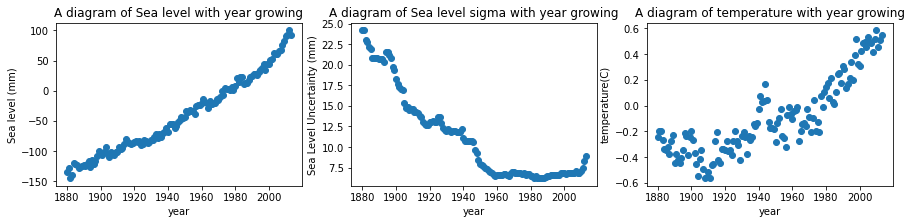

In [846]:
#resource to plot the diagram 
#for set up diagram with same row :
#https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python

#https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xlabel-in-python/ for setlablel x,y function
#use scatter function to lot the data points 
x=year
y1=sealevel
y2=sealevel_sigma
y3=temperature

#make diagram in one row
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
axes[0].scatter(x,y1)
#use setlabel instead label function
axes[0].set_xlabel('year')
axes[0].set_ylabel('Sea level (mm)')
axes[0].set_title("A diagram of Sea level with year growing")

axes[1].scatter(x,y2)
#use setlabel instead label function
axes[1].set_xlabel('year')
axes[1].set_ylabel('Sea Level Uncertainty (mm)')
axes[1].set_title("A diagram of Sea level sigma with year growing")

axes[2].scatter(x,y3)
#use setlabel instead label function
axes[2].set_xlabel('year')
axes[2].set_ylabel('temperature(C)')
axes[2].set_title("A diagram of temperature with year growing")

plt.show()

**Part A (ii):** How does the uncertainty in global mean sea levels change as a function of time?  When is the uncertainty the highest?  Give one reason why you think this might be the case.

Answer: The uncertainty in global mean sea levels decreasing since 1880 with years; the uncertainty is highest at yaer 1880; One reason is that scientific measurement calculations are becoming more and more advanced, and more accurate instruments have been invented, so the uncertainty is getting smaller and smaller.

---

**Part B:**  The "out-of-box" sea-level model

In your plot from **(a)**, you should see quite an apparent relationship between increasing temperatures and rising sea levels.  Seeems like someone should try to model the relationship between those two, huh?

In the helper function, slr, below, a simple model for temperature-driven changes in global mean sea level (GMSL) is defined. This is the model of [Rahmstorf (2007)](http://science.sciencemag.org/content/315/5810/368).

The `slr` model takes two parameters, $\alpha$ and $T_{eq}$, and requires a time series of global mean temperatures: `slr(alpha, Teq, temperature)`.
* `alpha` is the sensitivity of sea-level changes to changes in global temperature. The units for $\alpha$ are millimeters of sea-level changes per year, or mm y$^{-1}$.
* `Teq` is the equilibrium global mean temperature, with units of degrees Celsius.
* `temperature` is the time series of global mean surface temperatures, assumed to be relative to the 1961-1990 mean.

For now, you do not need to worry too much about how this model works.  It is very simple, and widely used, but the point here is that you can plug in a particular set of temperatures (the model **forcing**) and parameters ($\alpha$ and $T_{eq}$), and out pops a time series of simulated global mean sea levels.

**Our goal:**  pick good values for $\alpha$ and $T_{eq}$, so that when we run the `slr` model using the observations of temperature (which we plotted above), the model output matches well the observations of global mean sea level (which we also plotted above).

The whole process of figuring out what these good parameter values are is called **model calibration**, and it's awesome.  Model Calibration is the point of this problem. Let's have a look at why we need to do this in the first place, shall we?

The default parameter choices given in the Rahmstorf (2007) paper are $\alpha=3.4$ mm y$^{-1}$ and $T_{eq} = -0.5\ ^{\circ}$C.

**Your task for Part B:**

Make a plot that contains:
* the observed sea level data as scatter points
* the modeled sea levels as a line, using the temperature observations from above as the `temperature` input
* an appropriate legend and axis labels
* $x$ axis is years
* $y$ axis is sea level

Note that after you run the `slr` model, you will need to **normalize** the output relative to the 1961-1990 reference period.  That is because you are going to compare it against data that is also normalized against this reference period. The `years` that correspond to the model output should be the same as the `years` that correspond to the `temperature` input. Normalizing data can mean several things. Follow the steps outlined below to "normalize" the data in the way needed for this problem:
- Compute the mean of the output of the slr model for the years from 1961-1990 (inclusive).
- Subtract this value from each entry in the "sealevel" list (list returned by the slr function)


Make sure that you normalize the data prior to plotting.

In [609]:
# helpers

def slr(alpha, Teq, temperature):
    '''sea-level emulator of Rahmstorf 2007 (DOI: 10.1126/science.1135456)
    Takes global mean temperature as forcing, and parameters:
    alpha = temperature sensitivity of sea level rise, and
    Teq   = equilibrium temperature,
    and calculates a rise/fall in sea levels, based on whether the temperature
    is warmer/cooler than the equilibrium temperature Teq.
    Here, we are only worrying about alpha (for now!)'''

    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel

slr mean value: -50.40320344827593
without slr mean value: -0.8482758620689659


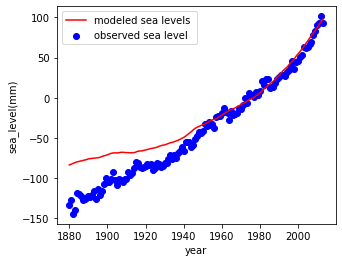

In [1223]:
# Your code here.
# for index function https://www.w3schools.com/python/trypython.asp?filename=demo_ref_list_index2
#for mean in some range https://www.javatpoint.com/numpy-mean
#combine these to do step1 mean of certain range

#1. Compute the mean of the output of the slr model for the years from 1961-1990 (inclusive).
out=slr(3.4,-0.5,temperature)

#mean from point 1961-1990
#np.mean[a:b], .index(i)  get the value at position i
a=out[year.index(1961):year.index(1990)]
out_mean=np.mean(a)

#get mean for sealeval without slr
b=sealevel[year.index(1961):year.index(1990)]
sealevel_mean=np.mean(b)
print('slr mean value:',out_mean)
print('without slr mean value:',sealevel_mean)

#2. Subtract this value from each entry in the "sealevel" list
for i in range(len(sealevel)):
    new_sealevel[i]=sealevel[i]-sealevel_mean
#second graph
for i in range(len(out)):
    new_slr[i]=out[i]-out_mean
x=year
y=new_sealevel #observed
y2=new_slr    #model

figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))

axis.set_xlabel('year')
axis.set_ylabel('sea_level(mm)')
#scatter points
axis.scatter(x,y,label='observed sea level ',color='blue')
#line
axis.plot(x,y2,label='modeled sea levels ',color='red')
#only call legend after make the color
axis.legend()
plt.show()

Your plot above ought to show decent match for the late 1900s, but diverge a bit further back in time.

**The point:**  We can do better than this "out-of-the-box" version of the Rahmstorf sea level model.

**Part C:**   Figuring out our objective function

As our **objective function**, we will use the joint likelihood function of the observed sea level data, given the model simulation.  The following is a detailed description of the derivation of the objective funciton for a hill climbing routine. **Note, you do not need to do anything for this part other than to read about the objective function and execute the cell below, then move to part D.**

For a single data point in year $i$, $y_i$, with associated uncertainty $\sigma_i$, we can assume the likelihood for our model simulation in year $i$, $\eta_i$, follows a normal distribution centered at the data point.  The model simulation is a **deterministic** result of our parameter choices $\alpha$ and $T_{eq}$, so we write the likelihood as:

$$L(y_i \mid \alpha, T_{eq}) = \dfrac{1}{\sqrt{2 \pi} \sigma_i} e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}$$

But that only uses a single data point.  Let's use all the data!  The **joint likelihood** is the product of all of the likelihoods associated with the individual data points. But that is the product of a lot of numbers that are less than 1, so it will be **tiny**.  Instead, we should try to optimize the **joint log-likelihood**, which is simply the (natural) logarithm of the joint likelihood function.

If we assume the observational data ($y_i$) are all independent, then the joint log-likelihood is:

$$l(\mathbf{y} \mid \alpha, T_{eq}) = -\dfrac{N}{2} \log{(2\pi)} - \sum_{i=1}^N \log{(\sigma_i)} - \dfrac{1}{2}\sum_{i=1}^N \left( \dfrac{\eta_i(\alpha, T_{eq}) - y_i}{\sigma_i} \right)^2$$

where, $\mathbf{y} = [y_1, y_2, \ldots, y_N]$ is the entire vector (list) of sea level observations, $\eta(\alpha, T_{eq}) = [\eta_1(\alpha, T_{eq}), \eta_2(\alpha, T_{eq}), \ldots, \eta_N(\alpha, T_{eq})]$ is the entire vector (list) of `slr` model output when the parameter values $\alpha$ and $T_{eq}$ are used, and $N$ is the number of observations we have.

**Defining our objective function**

Now define a `log_likelihood(parameters, obs_mu, obs_sigma)` function:
* `parameters`: argument that is a list of two parameter values, $[\alpha, T_{eq}]$
  * within the likelihood function, you will need to generate the model simulation $\eta(\alpha, T_{eq})$ using the input `parameters`, for comparison against the observational data
* `obs_temp`: argument that is a time series (list) of observed global mean temperatures, that will be used to run the `slr` model. Provide a default value of `temperature` for this, because we only have one temperature data set to use, and we don't want to keep 
* `obs_mu`: argument that is a time series (list) of observed values, that will be used for comparison against the `model` output. Provide a default value of `sealevel` here, because we won't be changing the observational data.
* `obs_sigma`: argument that is a time series (list) of the corresponding uncertainties in the observational data. Simiarly, provide a default value of `sealevel_sigma` here, so we can avoid the tedious task of sending the data set into this function.
* all three of these inputs should be lists, and should be the same length
* this routine should return a **single** float number, that is the joint log-likelihood of the given `model` simulation.

In [872]:
# Here is the objective function. You will be using this function below when you code up hill-climbing and 
# simulated annealing routines.

def log_likelihood(parameters, obs_temp=temperature, obs_mu=sealevel, obs_sigma=sealevel_sigma):
    model = slr(alpha=parameters[0], Teq=parameters[1], temperature=temperature)
    
    # normalize
    reference = (year.index(1961), year.index(1990))
    model -= np.mean(model[reference[0]:(reference[1]+1)])

    return np.sum([np.log(stats.norm.pdf(x=model, loc=obs_mu, scale=obs_sigma))])

**Part D:**  Defining our class structure

Now we will apply a hill-climbing algorithm to tune the $\alpha$ and $T_{eq}$ parameters.

Using our in-class lecture notebook on hill-climbing as a guide, do the following:

* Define a `State` class, with attributes for the parameter values (which define the state) and the objective function value of that state.
* Define a `Problem_hillclimb` **sub-class** of the more general class `Problem`, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * methods for `moves` (return the list of all possible moves from the current state) and `best_move` (return the move that maximizes the objective function).
  * the `moves` available should be in proper 2-dimensional space.  Do **not** simply optimize one parameter, keeping the other fixed, then optimize the other parameter, while keeping the first fixed.  (*That method *can* work, but there are some theoretical issues that would need to be tackled, and we are not getting into that here.*) You are allowed to restrict yourself to movements along a grid, as long as you entertain steps in both the $\alpha$ and the $T_{eq}$ directions.
* Define the `hill_climb` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `hill_climb(problem, n_iter)`:  arguments are a `Problem_hillclimb` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

In [1435]:
# Your code here.
# some code from Lecture 13,14 Notebook on canvas,also look it to get idea.
class state:
    #init_ 2 parameters with self
    #above,parameters:argument that is a list of two parameter values, so v is a a list of two item
    #, "node,value" from lecture notebook as "value,obj_v" in here
    def __init__(self,v,obj_v):
        self.obj_v=obj_v
        self.v=[v[0],v[1]]
        
class problem:
    def __init__(self,initial,objective_function,stepsize):
        self.current_state=initial
        self.objective_function=objective_function
        #two different stepsize, store stepsize a list of alpha and T
        self.a=stepsize[0]
        self.T=stepsize[1]
        
     #subclass of problem
class Problem_hillclimb(problem):
        #code from lec14 notebook,the difference is our value have v[0],v[1], 
        #so there will be 4 line and also have two stepsize,each line have two items
        #node is correspond v ,v[0] correspond a,v[0] correspond T        
    def moves(self):
        all_moves = []
#             all_moves.append(self.current_state.node + self.stepsize)
#             all_moves.append(self.current_state.node - self.stepsize)
           #both move right 
        moves_init=[]
        # #note that all_moves is a list, form is (()), with 2 iteam in a truple
        all_moves.append((self.current_state.v[0] + self.a,self.current_state.v[1] + self.T))
         #both move left
        all_moves.append((self.current_state.v[0] - self.a,self.current_state.v[1] - self.T ))
        #one move left, one move right
        all_moves.append((self.current_state.v[0] - self.a,self.current_state.v[1] +self.T))
                #note that all_moves is a list, form is (()), with 2 iteam in a truple
        all_moves.append((self.current_state.v[0] + self.a,self.current_state.v[1] -self.T))
        return all_moves
    
    def best_move(self):
        '''return the best move possible from the current_state'''
        # what moves are possible?
        all_moves = self.moves()
        # what is objective function for each of them?
        obj_func = [self.objective_function(move) for move in all_moves]
        #the first index represent a, the second index represent T
        best_a=all_moves[max(zip(obj_func, range(len(obj_func))))[1]][0]
        best_T=all_moves[max(zip(obj_func, range(len(obj_func))))[1]][1]
        #inital alpha and inital_Teaperature
        init_a=self.current_state.v[0]
        init_b=self.current_state.v[1]
        #compare object function with best_a and best_T value,choose one of them
        if self.objective_function([best_a, init_b])<= self.objective_function([init_a, best_T]):
        #   if best Temp yard greater obj_value, return it 
            return (init_a, best_T)
        else:
            #else return best aplha_plus value
            return (best_a, init_b)

def hill_climb(problem, n_iter):
    
    #version from lect notebool
    for k in range(n_iter):
        
        best = problem.best_move()
        if problem.objective_function(best)<= problem.current_state.obj_v :
            return problem.current_state
        
        #addition else call
        #if without else statement, it will always return false
        else:
            #if obj_fnt_value is large, then replace it value to current value
            problem.current_state.obj_v = problem.objective_function(problem.current_state.v)
            #also replace best value to current vale, then return
            problem.current_state.v = best
            return problem.current_state
    print('reached n_iter')
    return False

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a hill-climbing problem object, using this initial state, the log-likelihood objective function, and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
3. ***hill-climb!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**
* As a benchmark, make sure that your log-likelihood is *at least* -500.
* Your calibrated (optimized) model simulation should be going straight through the data points.
* If this isn't the case, remember to normalize your model against the 1961-1990 reference period!

alpha value: 3.4 temperature value: -0.62 corresponding log-likelihood value: -576.2160507179199


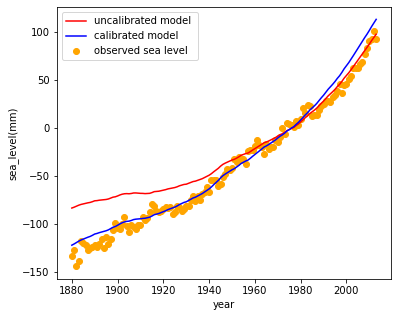

In [1374]:
# Your code here.
# for index function https://www.w3schools.com/python/trypython.asp?filename=demo_ref_list_index2
#for mean in some range https://www.javatpoint.com/numpy-mean
#combine these to do step1 mean of certain range

#1. Compute the mean of the output of the slr model for the years from 1961-1990 (inclusive).
a=3.4
T=-0.5
obj_fnt=log_likelihood
initial = state([a,T], obj_fnt([a,T]))
#the best stepsize is 0.1 and 0.12
gaussian_problem = Problem_hillclimb(initial, obj_fnt, [0.1,0.12])
out_2 = hill_climb(gaussian_problem, n_iter=500)

out_3=slr(out_2.v[0], out_2.v[1], temperature)


#2.compute the mean for get the approx straight line
c=out_3[year.index(1961):year.index(1990)]
hill_climb_mean=np.mean(c)
for i in range(len(out_3)):
    out_3[i]=out_3[i]-hill_climb_mean
    
#plot the diagram
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axis.set_xlabel('year')
axis.set_ylabel('sea_level(mm)')
#scatter points
axis.scatter(x,y,label='observed sea level ',color='orange')#observed sea level in part b
#line
axis.plot(x,y2,label='uncalibrated model ',color='red') #modeled sea level in part b with slr
axis.plot(x,out_3,label='calibrated model ',color='blue')
#only call legend after make the color
axis.legend()

print('alpha value:', out_2.v[0], 'temperature value:', out_2.v[1],'corresponding log-likelihood value:', out_2.obj_v)

plt.show()


**Part E:**  Simulated annealing

Let's re-calibrate the `slr` model. This time, we will use **simulated annealing**. Again, using our in-class activity as a guide, do the following:

* Continue to use your `State` class above.
* Define a `Problem_annealing` sub-class of the `Problem` class, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * method for `random_move`, to pick a random move **by drawing from a multivariate normal distribution**.  You should use the `stepsize` attribute as the covariance (width) for this.
* Define the `simulated_annealing` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `simulated_annealing(problem, n_iter)`:  arguments are a `Problem_annealing` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

Subject to the above constraints, you may implement these however you would like.

In [1436]:
# Your code here.
#code from lecture 14 notebook   
   
class problem_anneal(problem):
#    def __init__(self, initial, objective_function, stepsize):
    def __init__(self, initial, objective_function, stepsize):
        problem.__init__(self, initial, objective_function, stepsize)
#         self.schedule_function = schedule_function
    def random_move(self):
        '''return a random move, possible from the current_state'''
        all_moves = self.moves()
        next_move = np.random.choice(all_moves)
        return next_move, self.objective_function(next_move)    

def schedule(time):
    '''some sort of mapping from time to temperature, to represent how we should be 
    "cooling off" - that is, accepting wacky solutions with lower and lower probability'''
    C = 20#
    p = 0.7#
    temperature = C/(time+1)**p
    
    return temperature

# def simulated_annealing(problem, n_iter):
    
#     current = problem.initial_state
    
#     for t in range(n_iter):
#         temperature = problem.schedule_function(t)
#         nextMove,nextValue = problem.random_move()
#         delta_obj = current.value - nextValue
        
#         if delta_obj > 0:
#             problem.current_state.node, problem.current_state.value = nextMove,nextValue
            
#         else:
#             p_accept = np.exp(delta_obj/temperature)
            
#             accept = np.random.choice([True,False],p=[p_accept,1-p_accept])
            
#             if accept:
#                 problem.current_state.node, problem.current_state.value = nextMove,nextValue
                
                
#     return problem.current_state

def simulated_annealing(problem, n_iter):
    
    #version from lect notebool
    for k in range(n_iter):
        
        best = problem.best_move()
        if problem.objective_function(best)<= problem.current_state.obj_v :
            return problem.current_state
        
        #addition else call
        #if without else statement, it will always return false
        else:
            #if obj_fnt_value is large, then replace it value to current value
            problem.current_state.obj_v = problem.objective_function(problem.current_state.v)
            #also replace best value to current vale, then return
            problem.current_state.v = best
            return problem.current_state
    print('reached n_iter')
    return False
                
                

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a simulated annealing problem object, using this initial state, the log-likelihood objective function, an appropriate temperature updating schedule and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
  * note that this "temperature" is distinct from the actual physical temperature used as input to drive the `slr` model
3. ***anneal!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**  How does your model look when you plot it against the data? If it doesn't look good, then you failed this unit test :(

alpha value: 3.4 temperature value: -0.66 corresponding log-likelihood value: -576.2160507179199


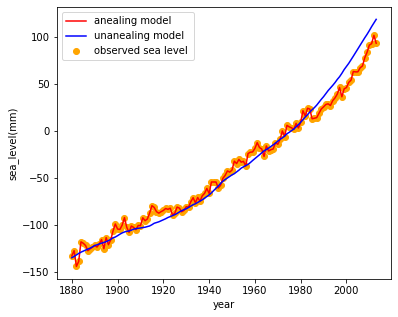

In [1439]:

a=3.4
T=-0.5
obj_fnt=log_likelihood
initial = state([a,T], obj_fnt([a,T]))
y4=new_sealevel
problem=Problem_hillclimb
anneal_problem = problem(initial, obj_fnt,stepsize=[0.1,0.16])
out_2 = simulated_annealing(anneal_problem, n_iter=300)
out_3=slr(out_2.v[0], out_2.v[1], temperature)
y=new_sealevel #observed
#2.compute the mean for get the approx straight line
c=out_3[year.index(1961):year.index(1990)]
anealing_mean=np.mean(c)
for i in range(len(out_3)):
    out_3[i]=out_3[i]-anealing_mean
    
#plot the diagram
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axis.set_xlabel('year')
axis.set_ylabel('sea_level(mm)')
#scatter points
axis.scatter(x,y,label='observed sea level ',color='orange')#observed sea level in part b
#line
axis.plot(x,y4,label='anealing model ',color='red') #modeled sea level in part b with slr
axis.plot(x,out_3,label='unanealing model ',color='blue')
#only call legend after make the color
axis.legend()

print('alpha value:', out_2.v[0], 'temperature value:', out_2.v[1],'corresponding log-likelihood value:', out_2.obj_v)

plt.show()

**Part F:**

Briefly summarize your findings. Specifically discuss the $\alpha$ and $T_{eq}$ parameter values you found in **Part D** and **Part E**. How do these compare to the parameters of the model given by Rahmstorf? Did your hill-climbing and/or your simulated annealing programs find a better fit than the Rahmstorf model? 

Answer：I find that hill climbing and/or simulated annealing procedures are getting closer to the scatter point. The parameter values of 𝛼 and 𝑇𝑒𝑞 that I found in Part D and Part E are not much different from the model parameters given by Rahmstorf, they are all around 3, 4, -0.62/0.66, but the value of T is different and increases by 0. 2 or so, possibly while determining one number as a constant, the resin will depend on another number. I feel that the simulated annealing procedure is more suitable than the Rahmstorf model to analyze the data.